In [59]:
import sys
import numpy
import pandas as pd
import numpy as rp

In [60]:
dataset = pd.read_csv("flightdata.csv")

In [61]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [62]:
dataset.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [63]:
dataset.ARR_DEL15.value_counts()

0.0    9668
1.0    1375
Name: ARR_DEL15, dtype: int64

In [64]:
dataset.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [65]:


dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [66]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [67]:
dataset = dataset.drop( 'Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [68]:
import seaborn as sns
%matplotlib inline

In [69]:
flight_data = pd.read_csv("flightdata.csv")
flight_data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

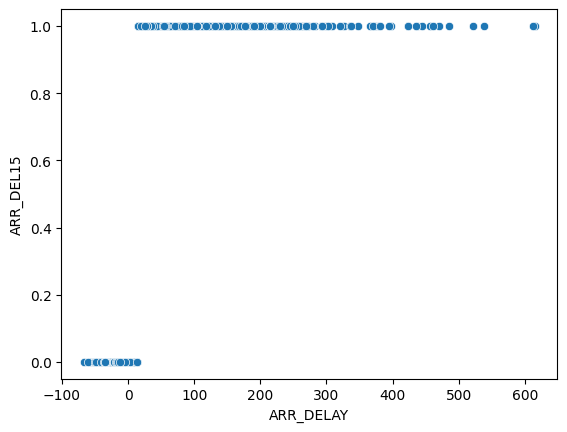

In [70]:
sns.scatterplot( x='ARR_DELAY',y='ARR_DEL15', data=flight_data)

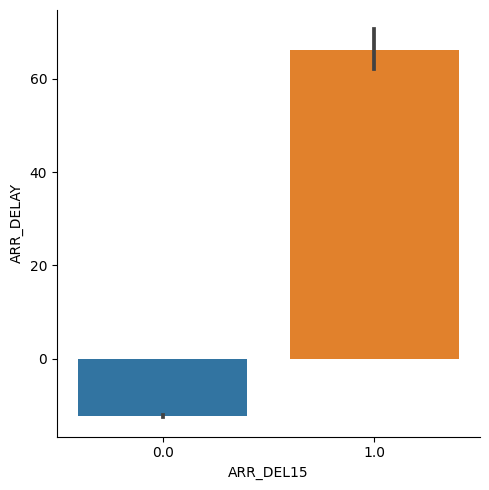

In [71]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=flight_data)

<ipython-input-72-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

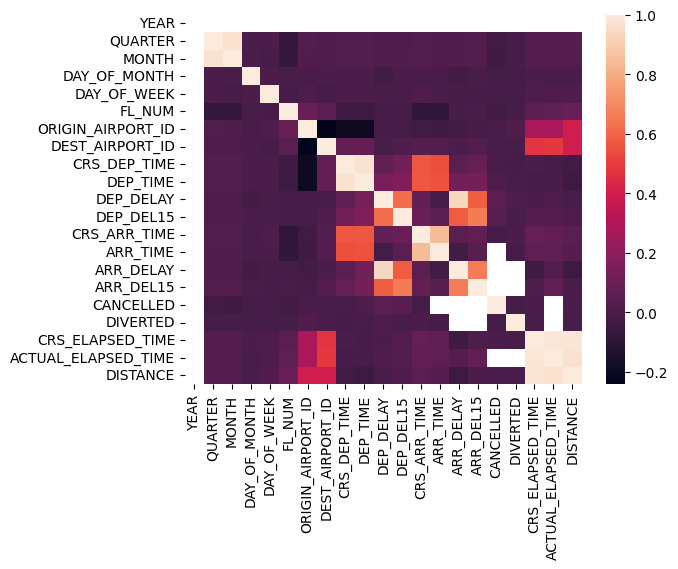

In [72]:
sns.heatmap(dataset.corr())

In [73]:
#filter the dataset to eliminate colums that aren't relevant to a predictive model.
dataset = dataset[{"FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"}]
dataset.isnull().sum()

<ipython-input-73-b652c3e1c396>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset = dataset[{"FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"}]


ORIGIN            0
DEST              0
MONTH             0
ARR_DEL15       188
CRS_ARR_TIME      0
DAY_OF_WEEK       0
DEP_DEL15       107
FL_NUM            0
DAY_OF_MONTH      0
dtype: int64

In [74]:
dataset[dataset.isnull().any(axis=1)].head(10)

,ORIGIN,DEST,MONTH,ARR_DEL15,CRS_ARR_TIME,DAY_OF_WEEK,DEP_DEL15,FL_NUM,DAY_OF_MONTH
177,MSP,SEA,1,NaN,852,6,0.0,2834,9
179,MSP,DTW,1,NaN,1632,7,NaN,86,10
184,MSP,DTW,1,NaN,912,7,0.0,557,10
210,DTW,MSP,1,NaN,1303,7,NaN,1096,10
478,SEA,JFK,1,NaN,723,5,NaN,1542,22
481,ATL,JFK,1,NaN,2014,5,NaN,1795,22
491,MSP,JFK,1,NaN,2149,5,NaN,2312,22
499,JFK,ATL,1,NaN,1600,6,NaN,423,23
500,JFK,ATL,1,NaN,1827,6,NaN,425,23
501,JFK,SEA,1,NaN,1053,6,NaN,427,23


In [75]:
dataset['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [76]:
#replace the missing values with is.
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,ORIGIN,DEST,MONTH,ARR_DEL15,CRS_ARR_TIME,DAY_OF_WEEK,DEP_DEL15,FL_NUM,DAY_OF_MONTH
177,MSP,SEA,1,1.0,852,6,0.0,2834,9
178,DTW,JFK,1,0.0,1724,6,0.0,2839,9
179,MSP,DTW,1,1.0,1632,7,0.0,86,10
180,DTW,MSP,1,0.0,1649,7,1.0,87,10
181,JFK,ATL,1,0.0,1600,7,0.0,423,10
182,JFK,ATL,1,0.0,849,7,0.0,440,10
183,JFK,SEA,1,0.0,1945,7,1.0,485,10
184,MSP,DTW,1,1.0,912,7,0.0,557,10


In [77]:
import math

for index, row in dataset.iterrows():
  dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row[ 'CRS_ARR_TIME'] / 100)
dataset.head()

,ORIGIN,DEST,MONTH,ARR_DEL15,CRS_ARR_TIME,DAY_OF_WEEK,DEP_DEL15,FL_NUM,DAY_OF_MONTH
0,ATL,SEA,1,0.0,21,5,0.0,1399,1
1,DTW,MSP,1,0.0,14,5,0.0,1476,1
2,ATL,SEA,1,0.0,12,5,0.0,1597,1
3,SEA,MSP,1,0.0,13,5,0.0,1768,1
4,SEA,DTW,1,0.0,6,5,0.0,1823,1


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [79]:
dataset.head(5)

,ORIGIN,DEST,MONTH,ARR_DEL15,CRS_ARR_TIME,DAY_OF_WEEK,DEP_DEL15,FL_NUM,DAY_OF_MONTH
0,0,4,1,0.0,21,5,0.0,1399,1
1,1,3,1,0.0,14,5,0.0,1476,1
2,0,4,1,0.0,12,5,0.0,1597,1
3,4,3,1,0.0,13,5,0.0,1768,1
4,4,1,1,0.0,6,5,0.0,1823,1


In [80]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [81]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,MONTH,ARR_DEL15,CRS_ARR_TIME,DAY_OF_WEEK,DEP_DEL15,FL_NUM,DAY_OF_MONTH,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1,0.0,21,5,0.0,1399,1,1,0,0,0,0,0,0,0,0,1
1,1,0.0,14,5,0.0,1476,1,0,1,0,0,0,0,0,0,1,0
2,1,0.0,12,5,0.0,1597,1,1,0,0,0,0,0,0,0,0,1
3,1,0.0,13,5,0.0,1768,1,0,0,0,0,1,0,0,0,1,0
4,1,0.0,6,5,0.0,1823,1,0,0,0,0,1,0,1,0,0,0


In [82]:
dataset.iloc[:, 8:9]

,ORIGIN_1
0,0
1,1
2,0
3,0
4,0
...,...
11226,1
11227,0
11228,1
11229,0


In [83]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [84]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [85]:
x

array([[1.000e+00, 0.000e+00, 2.100e+01, ..., 1.399e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.400e+01, ..., 1.476e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.200e+01, ..., 1.597e+03, 1.000e+00,
        1.000e+00],
       ...,
       [1.200e+01, 0.000e+00, 2.200e+01, ..., 1.823e+03, 3.000e+01,
        0.000e+00],
       [1.200e+01, 0.000e+00, 1.800e+01, ..., 1.901e+03, 3.000e+01,
        1.000e+00],
       [1.200e+01, 0.000e+00, 9.000e+00, ..., 2.005e+03, 3.000e+01,
        1.000e+00]])

In [86]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [87]:
x.shape

(11231, 8)

In [88]:

y.shape

(11231, 1)

In [89]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()
#x=np.delete(x,[4,7],axis=1)

In [90]:
z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [91]:
t

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
def np():
  x=np.delete(x,[4,5],axis =1)

In [93]:
x.shape

(11231, 8)

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
x_test.shape

(2247, 8)

In [96]:
y_test.shape

(2247, 1)

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [98]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
                                

DecisionTreeClassifier(random_state=0)

In [99]:
decisiontree = classifier.predict(x_test)

In [100]:
decisiontree

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [101]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [102]:
desacc

0.9893190921228304

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,decisiontree)

In [104]:
cm

array([[1793,    9],
       [  15,  430]])

In [105]:
import sklearn.metrics as metrics
fpr1 ,tpr1 ,threshold =metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)                                      

In [106]:
fpr1

array([0.        , 0.00499445, 1.        ])

In [107]:
tpr1

array([0.        , 0.96629213, 1.        ])

In [108]:
def threshold1():
  threshold1

In [109]:
threshold1

<function __main__.threshold1()>

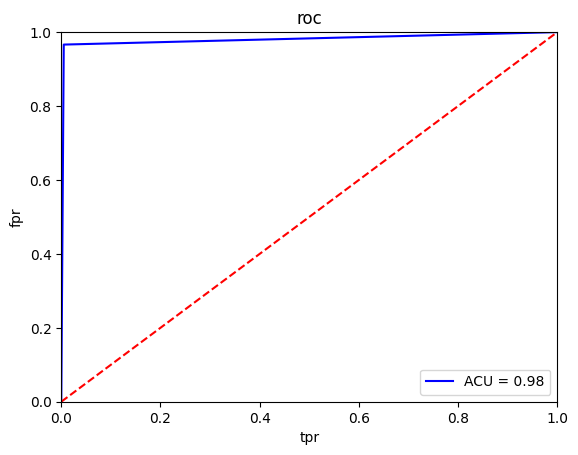

In [110]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'ACU = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [111]:
import pickle
pickle.dump(classifier,open('flight.pk1','wb'))